## Import Libraries

In [1]:
import pandas as pd
import numpy as np
from sklearn.metrics import classification_report,roc_auc_score,RocCurveDisplay
from sklearn.model_selection import train_test_split
from sklearn import metrics
import matplotlib.pyplot as plt
from sklearn.linear_model import LogisticRegression


### Task 1

In [2]:
raw_data = pd.read_csv("Project1_data.csv")
raw_data.head()

,age,job,marital,education,balance,housing,loan,y
0,58,management,married,tertiary,2143,yes,no,no
1,44,technician,single,secondary,29,yes,no,no
2,33,entrepreneur,married,secondary,2,yes,yes,no
3,47,blue-collar,married,unknown,1506,yes,no,no
4,33,unknown,single,unknown,1,no,no,no


### Task 2

Check for Nulls in the data

In [3]:
raw_data.isna().sum()

age            0
job          311
marital        0
education      0
balance        0
housing        0
loan           0
y             14
dtype: int64

In [4]:
raw_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45211 entries, 0 to 45210
Data columns (total 8 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   age        45211 non-null  int64 
 1   job        44900 non-null  object
 2   marital    45211 non-null  object
 3   education  45211 non-null  object
 4   balance    45211 non-null  int64 
 5   housing    45211 non-null  object
 6   loan       45211 non-null  object
 7   y          45197 non-null  object
dtypes: int64(2), object(6)
memory usage: 2.8+ MB


#### Since 'y' is our target variable, records where the target variable values are missing are to be dropped.

In [5]:
raw_data = raw_data.dropna(subset=['y'])
raw_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 45197 entries, 0 to 45210
Data columns (total 8 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   age        45197 non-null  int64 
 1   job        44886 non-null  object
 2   marital    45197 non-null  object
 3   education  45197 non-null  object
 4   balance    45197 non-null  int64 
 5   housing    45197 non-null  object
 6   loan       45197 non-null  object
 7   y          45197 non-null  object
dtypes: int64(2), object(6)
memory usage: 3.1+ MB


In [6]:
raw_data['y'].value_counts()/len(raw_data)

no     0.883001
yes    0.116999
Name: y, dtype: float64

In [7]:
raw_data.isna().sum()

age            0
job          311
marital        0
education      0
balance        0
housing        0
loan           0
y              0
dtype: int64

In [8]:
raw_data.job.unique()

array(['management', 'technician', 'entrepreneur', 'blue-collar',
       'unknown', 'retired', 'admin.', 'services', 'self-employed',
       'unemployed', 'housemaid', nan, 'student'], dtype=object)

In [9]:
raw_data.job.value_counts()

blue-collar      9671
management       9378
technician       7549
admin.           5132
services         4123
retired          2245
self-employed    1566
entrepreneur     1479
unemployed       1292
housemaid        1235
student           933
unknown           283
Name: job, dtype: int64

#### Impute Nulls in Job column with value 'unknown'

Job is categorical independent variable in the given dataset, since the percentage of missing values in this variable data is less, we can impute the nulls with value 'unknown'  

In [10]:
raw_data['job'] = raw_data['job'].fillna('unknown')
raw_data.isna().sum()

age          0
job          0
marital      0
education    0
balance      0
housing      0
loan         0
y            0
dtype: int64

### Task 3

In [11]:
raw_data.describe(include='all')

,age,job,marital,education,balance,housing,loan,y
count,45197.000000,45197,45197,45197,45197.000000,45197,45197,45197
unique,NaN,12,3,4,NaN,2,2,2
top,NaN,blue-collar,married,secondary,NaN,yes,no,no
freq,NaN,9671,27206,23192,NaN,25120,37955,39909
mean,40.864770,NaN,NaN,NaN,1311.152997,NaN,NaN,NaN
std,10.750966,NaN,NaN,NaN,3807.483417,NaN,NaN,NaN
min,0.000000,NaN,NaN,NaN,-99999.000000,NaN,NaN,NaN
25%,33.000000,NaN,NaN,NaN,72.000000,NaN,NaN,NaN
50%,39.000000,NaN,NaN,NaN,448.000000,NaN,NaN,NaN
75%,48.000000,NaN,NaN,NaN,1427.000000,NaN,NaN,NaN


In [12]:
raw_data['balance'] = np.sqrt(raw_data['balance'])

/Users/akhileshpothuri/opt/anaconda3/lib/python3.9/site-packages/pandas/core/arraylike.py:397: RuntimeWarning: invalid value encountered in sqrt
  result = getattr(ufunc, method)(*inputs, **kwargs)


In [13]:
raw_data.replace([np.inf, -np.inf], 0, inplace=True)

array([[<AxesSubplot:title={'center':'age'}>,
        <AxesSubplot:title={'center':'balance'}>]], dtype=object)

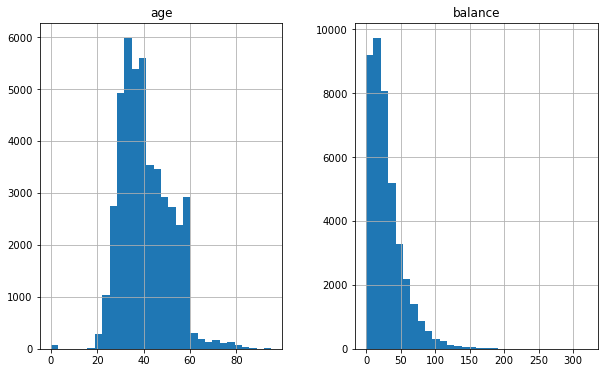

In [14]:
raw_data.hist(bins=30, figsize=(10, 6))

<AxesSubplot:>

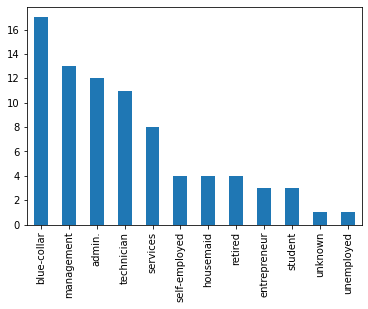

In [15]:
raw_data[raw_data['age']==0].job.value_counts().plot.bar(x='job', y='Frequency')

#### Age 0 appears to be erroneous data and hence is to be dropped from modelling

In [16]:
raw_data = raw_data[raw_data['age']!=0]

#### Since balance is right skewed, we fill the null values with mean value

In [17]:
raw_data['balance'] = raw_data['balance'].fillna(raw_data['balance'].mean())

array([[<AxesSubplot:title={'center':'age'}>,
        <AxesSubplot:title={'center':'balance'}>]], dtype=object)

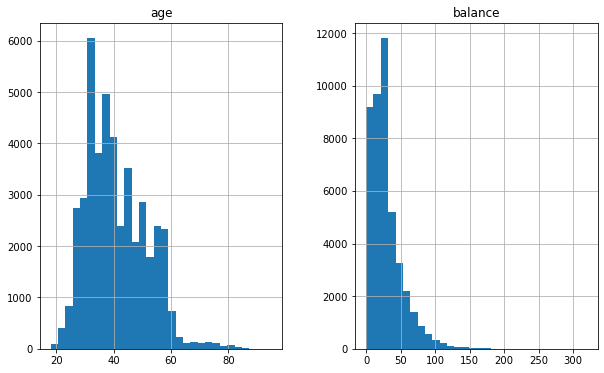

In [18]:
raw_data.hist(bins=30, figsize=(10, 6))

### Task 4

In [19]:

train_df, test_df = train_test_split(raw_data, test_size=0.2)

train_df = train_df.reset_index(drop=True)

test_df = test_df.reset_index(drop=True)

In [20]:
train_df.info(),test_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 36092 entries, 0 to 36091
Data columns (total 8 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   age        36092 non-null  int64  
 1   job        36092 non-null  object 
 2   marital    36092 non-null  object 
 3   education  36092 non-null  object 
 4   balance    36092 non-null  float64
 5   housing    36092 non-null  object 
 6   loan       36092 non-null  object 
 7   y          36092 non-null  object 
dtypes: float64(1), int64(1), object(6)
memory usage: 2.2+ MB
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9024 entries, 0 to 9023
Data columns (total 8 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   age        9024 non-null   int64  
 1   job        9024 non-null   object 
 2   marital    9024 non-null   object 
 3   education  9024 non-null   object 
 4   balance    9024 non-null   float64
 5   housing    9024 non-null   object 
 6  

(None, None)

### Task 5 

#### Exploratory Data Analysis

In [21]:
train_df.describe()

,age,balance
count,36092.000000,36092.000000
mean,40.989665,29.356966
std,10.648805,24.515830
min,18.000000,0.000000
25%,33.000000,13.228757
50%,39.000000,25.670995
75%,48.000000,37.911080
max,95.000000,319.573153


In [22]:
train_df.describe(include='all')

,age,job,marital,education,balance,housing,loan,y
count,36092.000000,36092,36092,36092,36092.000000,36092,36092,36092
unique,NaN,12,3,4,NaN,2,2,2
top,NaN,blue-collar,married,secondary,NaN,yes,no,no
freq,NaN,7713,21796,18516,NaN,20013,30267,31844
mean,40.989665,NaN,NaN,NaN,29.356966,NaN,NaN,NaN
std,10.648805,NaN,NaN,NaN,24.515830,NaN,NaN,NaN
min,18.000000,NaN,NaN,NaN,0.000000,NaN,NaN,NaN
25%,33.000000,NaN,NaN,NaN,13.228757,NaN,NaN,NaN
50%,39.000000,NaN,NaN,NaN,25.670995,NaN,NaN,NaN
75%,48.000000,NaN,NaN,NaN,37.911080,NaN,NaN,NaN


In [23]:
train_df.job.value_counts()

blue-collar      7713
management       7490
technician       6010
admin.           4104
services         3294
retired          1808
self-employed    1272
entrepreneur     1203
unemployed       1006
housemaid         975
student           748
unknown           469
Name: job, dtype: int64

In [24]:
train_df.marital.value_counts()

married     21796
single      10146
divorced     4150
Name: marital, dtype: int64

In [25]:
train_df.education.value_counts()

secondary    18516
tertiary     10658
primary       5433
unknown       1485
Name: education, dtype: int64

In [26]:
train_df.housing.value_counts()

yes    20013
no     16079
Name: housing, dtype: int64

In [27]:
train_df.loan.value_counts()

no     30267
yes     5825
Name: loan, dtype: int64

<AxesSubplot:ylabel='None'>

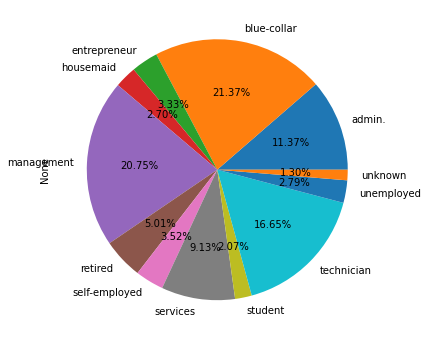

In [28]:
train_df.groupby('job').size().plot(kind='pie', autopct='%.2f%%',figsize=(11,6))

<AxesSubplot:>

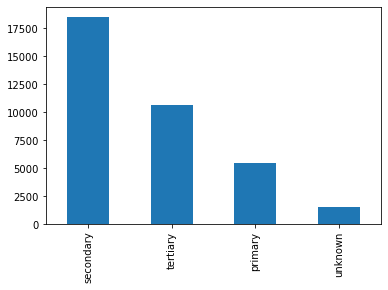

In [29]:
train_df.education.value_counts().plot.bar(x='Education', y='Frequency')

<AxesSubplot:ylabel='None'>

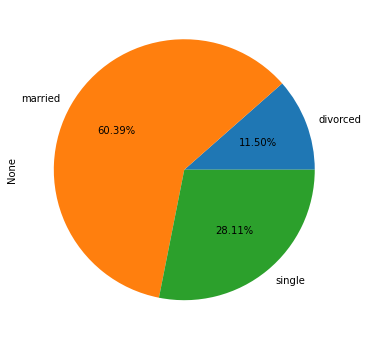

In [30]:
train_df.groupby('marital').size().plot(kind='pie', autopct='%.2f%%',figsize=(11,6))

array([[<AxesSubplot:title={'center':'age'}>,
        <AxesSubplot:title={'center':'balance'}>]], dtype=object)

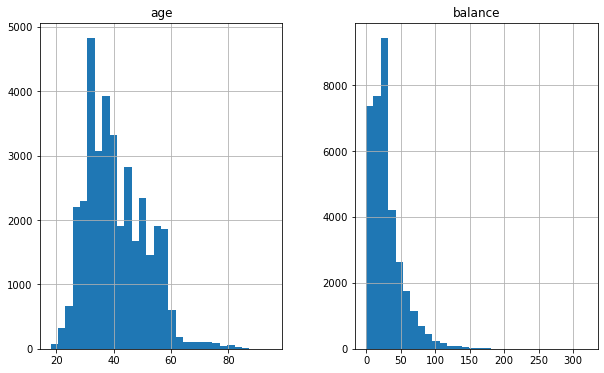

In [31]:
train_df.hist(bins=30, figsize=(10, 6))

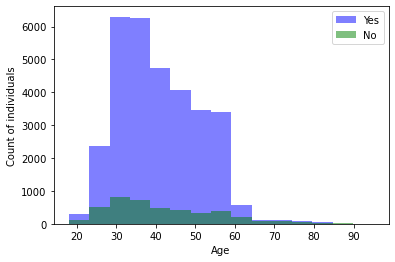

In [32]:
fig, ax = plt.subplots()

ax.hist(train_df[train_df["y"]=='no']["age"], bins=15, alpha=0.5, color="blue", label="Yes")
ax.hist(train_df[train_df["y"]=='yes']["age"], bins=15, alpha=0.5, color="green", label="No")

ax.set_xlabel("Age")
ax.set_ylabel("Count of individuals")


ax.legend();

1) The candidates with secondary education are dominant when compared to other levels of education  
2) Age variable is similar to a normal distribution with majority lying in the range of 30-40  
3) 60% of them are married  
4) The target variable is highly imbalanced

### Task 6

One-Hot Encoding the categorical Variables

In [33]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 36092 entries, 0 to 36091
Data columns (total 8 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   age        36092 non-null  int64  
 1   job        36092 non-null  object 
 2   marital    36092 non-null  object 
 3   education  36092 non-null  object 
 4   balance    36092 non-null  float64
 5   housing    36092 non-null  object 
 6   loan       36092 non-null  object 
 7   y          36092 non-null  object 
dtypes: float64(1), int64(1), object(6)
memory usage: 2.2+ MB


In [34]:
cat_columns = ['job','marital','education','housing','loan']

train_df = pd.get_dummies(train_df,columns = cat_columns)
test_df = pd.get_dummies(test_df,columns = cat_columns)

train_df.shape,test_df.shape

((36092, 26), (9024, 26))

In [35]:
display(train_df.head()),display(test_df.head())

,age,balance,y,job_admin.,job_blue-collar,job_entrepreneur,job_housemaid,job_management,job_retired,job_self-employed,...,marital_married,marital_single,education_primary,education_secondary,education_tertiary,education_unknown,housing_no,housing_yes,loan_no,loan_yes
0,37,49.416596,yes,0,0,0,0,0,0,0,...,0,1,0,1,0,0,1,0,1,0
1,52,44.988888,no,0,1,0,0,0,0,0,...,0,1,1,0,0,0,0,1,1,0
2,41,23.494680,no,0,1,0,0,0,0,0,...,1,0,0,1,0,0,0,1,1,0
3,36,56.753854,yes,1,0,0,0,0,0,0,...,1,0,0,0,1,0,1,0,1,0
4,45,13.416408,no,1,0,0,0,0,0,0,...,1,0,0,1,0,0,0,1,1,0


,age,balance,y,job_admin.,job_blue-collar,job_entrepreneur,job_housemaid,job_management,job_retired,job_self-employed,...,marital_married,marital_single,education_primary,education_secondary,education_tertiary,education_unknown,housing_no,housing_yes,loan_no,loan_yes
0,22,26.286879,yes,0,0,0,0,0,0,0,...,0,1,0,0,1,0,1,0,1,0
1,37,29.305404,no,0,1,0,0,0,0,0,...,1,0,0,1,0,0,0,1,0,1
2,30,30.512293,no,0,1,0,0,0,0,0,...,0,1,0,1,0,0,0,1,1,0
3,37,36.592349,no,0,0,0,0,1,0,0,...,0,1,0,0,1,0,0,1,1,0
4,47,7.810250,no,0,1,0,0,0,0,0,...,1,0,0,0,0,1,0,1,1,0


(None, None)

### Task 7

In [36]:
train_df['y'] = np.where(train_df['y']=='yes',0,1)
test_df['y'] = np.where(test_df['y']=='yes',0,1)

display(train_df.head()),display(test_df.head())

,age,balance,y,job_admin.,job_blue-collar,job_entrepreneur,job_housemaid,job_management,job_retired,job_self-employed,...,marital_married,marital_single,education_primary,education_secondary,education_tertiary,education_unknown,housing_no,housing_yes,loan_no,loan_yes
0,37,49.416596,0,0,0,0,0,0,0,0,...,0,1,0,1,0,0,1,0,1,0
1,52,44.988888,1,0,1,0,0,0,0,0,...,0,1,1,0,0,0,0,1,1,0
2,41,23.494680,1,0,1,0,0,0,0,0,...,1,0,0,1,0,0,0,1,1,0
3,36,56.753854,0,1,0,0,0,0,0,0,...,1,0,0,0,1,0,1,0,1,0
4,45,13.416408,1,1,0,0,0,0,0,0,...,1,0,0,1,0,0,0,1,1,0


,age,balance,y,job_admin.,job_blue-collar,job_entrepreneur,job_housemaid,job_management,job_retired,job_self-employed,...,marital_married,marital_single,education_primary,education_secondary,education_tertiary,education_unknown,housing_no,housing_yes,loan_no,loan_yes
0,22,26.286879,0,0,0,0,0,0,0,0,...,0,1,0,0,1,0,1,0,1,0
1,37,29.305404,1,0,1,0,0,0,0,0,...,1,0,0,1,0,0,0,1,0,1
2,30,30.512293,1,0,1,0,0,0,0,0,...,0,1,0,1,0,0,0,1,1,0
3,37,36.592349,1,0,0,0,0,1,0,0,...,0,1,0,0,1,0,0,1,1,0
4,47,7.810250,1,0,1,0,0,0,0,0,...,1,0,0,0,0,1,0,1,1,0


(None, None)

### Task 8

In [37]:
train_df.y.value_counts()

1    31844
0     4248
Name: y, dtype: int64

In [38]:
test_df.y.value_counts()

1    7995
0    1029
Name: y, dtype: int64

### Task 9

#### Logistic Regression

In [39]:
X_train = train_df.drop(columns=['y'])
Y_train = train_df[['y']]
X_test = test_df.drop(columns=['y'])
Y_test = test_df[['y']]

In [40]:
X_train.isna().sum()

age                    0
balance                0
job_admin.             0
job_blue-collar        0
job_entrepreneur       0
job_housemaid          0
job_management         0
job_retired            0
job_self-employed      0
job_services           0
job_student            0
job_technician         0
job_unemployed         0
job_unknown            0
marital_divorced       0
marital_married        0
marital_single         0
education_primary      0
education_secondary    0
education_tertiary     0
education_unknown      0
housing_no             0
housing_yes            0
loan_no                0
loan_yes               0
dtype: int64

In [41]:
logmodel = LogisticRegression()
logmodel.fit(X_train,Y_train)


/Users/akhileshpothuri/opt/anaconda3/lib/python3.9/site-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/Users/akhileshpothuri/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

### Task 10

In [42]:
predictions = logmodel.predict_proba(X_test)[::,1]

In [43]:
predictions

array([0.66955363, 0.96282182, 0.91151499, ..., 0.93716733, 0.92906036,
       0.82375795])

In [44]:
predictions.shape

(9024,)

### Task 11

#### ROC CURVE

In [45]:
roc_auc_score(Y_test, predictions)

0.68020519384382

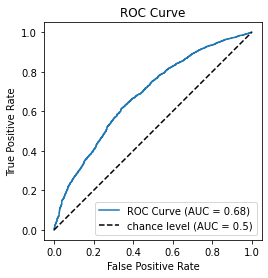

In [46]:
RocCurveDisplay.from_predictions(
    Y_test,
    predictions,
    name='ROC Curve'
)
plt.plot([0, 1], [0, 1], "k--", label="chance level (AUC = 0.5)")
plt.axis("square")
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Curve")
plt.legend()
plt.show()

### Task 12

Threshold from ROC Curve = 0.66

In [47]:
predictions = pd.Series([1 if x>0.6 else 0 for x in predictions]) ### result appears to be same from and above threshold 0.4

In [48]:
print(classification_report(Y_test,predictions))

              precision    recall  f1-score   support

           0       0.39      0.01      0.01      1029
           1       0.89      1.00      0.94      7995

    accuracy                           0.89      9024
   macro avg       0.64      0.50      0.48      9024
weighted avg       0.83      0.89      0.83      9024



### Task 13

In [49]:
metrics.confusion_matrix(Y_test, predictions)

array([[   7, 1022],
       [  11, 7984]])

### Task 14

The data set has records around 50k with various parameters including age, balance and their respective employement information.  
Age of all the individuals seems to be normally distributed in the range of 0 to 80.  
Quality of data : The target variable 'y' appears to be highly imbalanced with a class balance of 88% yes and 12% no and this requires rebalancing of the data by either downsampling or upsaampling the dataset.  
Meaningful insights were derived by performing Exploratory Data Analysis on variables education, employement and their correlation with our target variable.  
A better model could be built after rebalancing the data as the current data is highly biased which is to be considered by the stakeholders.